In [1]:
import pickle
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import colors
import spacy
import pandas as pd
# For better quality video
%matplotlib widget
plt.interactive(False)
nlp=spacy.load("en_core_web_md")

2023-08-08 17:56:09.440821: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-08 17:56:09.489164: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-08 17:56:09.490229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
#with open('/workspace/unitartucs-thesis-tokenMerge/coding/testpd.plk','rb') as f:
#    testpd=pickle.load(f)

#test1=testpd[:1000].copy()
#posidx=np.array(test1[test1['label']==1].index)
#negidx=np.array(test1[test1['label']==0].index)
#length=[]
#docs=nlp.pipe(test1['text'])
#for doc in docs:
#    length.append(len(doc)-6)
#test1['length']=length
with open('./first1000_testset.plk','rb') as f:
    test1=pickle.load(f)
with open('./test_totalCorpora.plk','rb') as f:
    totalCount=pickle.load(f)
with open('./test_negCorpora.plk','rb') as f:
    negCount=pickle.load(f)  
    
for k in totalCount.keys():
    total=totalCount[k]
    neg=negCount[k]
    negCount[k]=neg/total
posidx=np.array(test1[test1['label']==1].index)
negidx=np.array(test1[test1['label']==0].index)
with open('./Master_vocab.pkl','rb') as f:
    vocab=pickle.load(f)
tok2id=vocab['tok2id']
id2tok=vocab['id2tok']
endid=tok2id['e0s']
docs=nlp.pipe(test1['text'])
negtextFreq = []
poslist=[]
for doc in docs:
    countlist=[]
    plist=[]
    for token in doc:
        if(token.is_stop==False and token.is_punct==False):
            countlist.append(negCount[token.text])
            if(token.text!='s0s' and token.text!='e0s'):
                plist.append(token.pos)
            elif(token.text=='s0s'):
                plist.append(70)
            else:
                plist.append(78)
    negtextFreq.append(countlist)
    poslist.append(plist)

for i,r in enumerate(negtextFreq):
    if len(r)<175:
        negtextFreq[i]=(r+([negCount['e0s']]*(175-len(r))))
    else:
        negtextFreq[i]=negtextFreq[i][:175]
for i,r in enumerate(poslist):
    if len(r)<175:
        poslist[i]=(r+([78]*(175-len(r))))
    else:
        poslist[i]=poslist[i][:175]


negtextFreq=np.array(negtextFreq)
poslist=np.array(poslist)
path='/home/dick/RunpodData/'
run=os.listdir(path)
for i in range(len(run)):
    name=" ".join(run[i].split("_")[:3])
    print(f'{i:2d} {name:20s}')

 0 Curl MergePROP NewR1
 1 Curl MergeADJ R1    
 2 HPC Curl RandMerge  
 3 Curl RandMerge R11  
 4 HPC Curl BaseCase   
 5 Curl skipCCONJ R17  
 6 Curl skipCCONJ R1   
 7 Curl BaseCase R14   
 8 Curl RandMerge min2Max3
 9 HPCData Curl BaseCsae
10 HPC Curl MergeADJ   
11 BaseCase 256dim R1  
12 Curl BaseCase R10   
13 Curl RandMerge R1   
14 Curl BaseCase R1    
15 RandMerge 256dim min2max2
16 Curl MergePROPN R13 
17 Curl RandMerge min2max3
18 Curl MergePROPN R1  


In [75]:
curdataList = glob.glob(f'{path}{run[17]}/val_curldata_*.plk')
curldata={}
for file in curdataList:
    with open(f'{file}','rb') as f:
        try:
            tmp=pickle.load(f)
            i=list(tmp.keys())[0]
            curldata[i]=tmp[i]
        except EOFError:
            pass

print(sorted(list(curldata.keys())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [91]:
epoch=545
accy=pd.read_csv('./ResultLog/Curl_RandMerge_min2Max3_val.csv')
keys=list(curldata[epoch]['LSTM']['forward'].keys())
#keys=list(curldata[epoch]['forward'].keys())
print(keys)

[0, 25, 50, 75, 100, 125, 150]


In [92]:
#samplesize=min(len(negidx),len(posidx))
samplesize=200
print(samplesize)
direction='forward'
nsmpidx=np.random.choice(negidx,samplesize,replace=False)
psmpidx=np.random.choice(posidx,samplesize,replace=False)
epoch_in=curldata[epoch]['LSTM'][direction][0][:,:25,:]
epoch_curl=curldata[epoch]['LSTM'][direction][0][:,25:50,:]
epoch_div=curldata[epoch]['LSTM'][direction][0][:,50:,:]

#epoch_in=curldata[epoch][direction][0][:,:25,:]
#epoch_curl=curldata[epoch][direction][0][:,25:50,:]
#epoch_div=curldata[epoch][direction][0][:,50:,:]
for k in range(1,len(keys)):
    epoch_in = np.hstack((epoch_in,curldata[epoch]['LSTM'][direction][keys[k]][:,:25,:]))
    epoch_curl = np.hstack((epoch_curl,curldata[epoch]['LSTM'][direction][keys[k]][:,25:50,:]))
    epoch_div = np.hstack((epoch_curl,curldata[epoch]['LSTM'][direction][keys[k]][:,50:,:]))
    #epoch_in = np.hstack((epoch_in,curldata[epoch][direction][keys[k]][:,:25,:]))
    #epoch_curl = np.hstack((epoch_curl,curldata[epoch][direction][keys[k]][:,25:50,:]))
    #epoch_div = np.hstack((epoch_curl,curldata[epoch][direction][keys[k]][:,50:,:]))
    
in_l=np.linalg.norm(epoch_in,axis=-1)
epoch_in_unit = epoch_in/ in_l.reshape(1000,175,1)
curl_l=np.linalg.norm(epoch_curl,axis=-1)
epoch_curl_unit = epoch_curl/ curl_l.reshape(1000,175,1)

200


In [103]:
norm = Normalize()
negcolormap = cm.viridis
# POS Color Map
#norm = colors.BoundaryNorm(np.arange(70,104), negcolormap.N)
#norm.autoscale(poslist)
#nco=negcolormap(norm(poslist))

# Relative Position
co=np.arange(100)
norm.autoscale(co)
nco=negcolormap(norm(co))

# Positive Negative Sentiment
#co=np.zeros((1000,175))
#co[posidx,:]=1
#norm.autoscale(co)
#nco=negcolormap(norm(co))

# Negative Text Frequence
#norm.autoscale(negtextFreq)
#nco=negcolormap(norm(negtextFreq))

# Curl Length
#norm.autoscale(curl_l)
#nco=negcolormap(norm(curl_l))


sample=epoch_in_unit[:]
sample_curl=epoch_curl_unit[:]

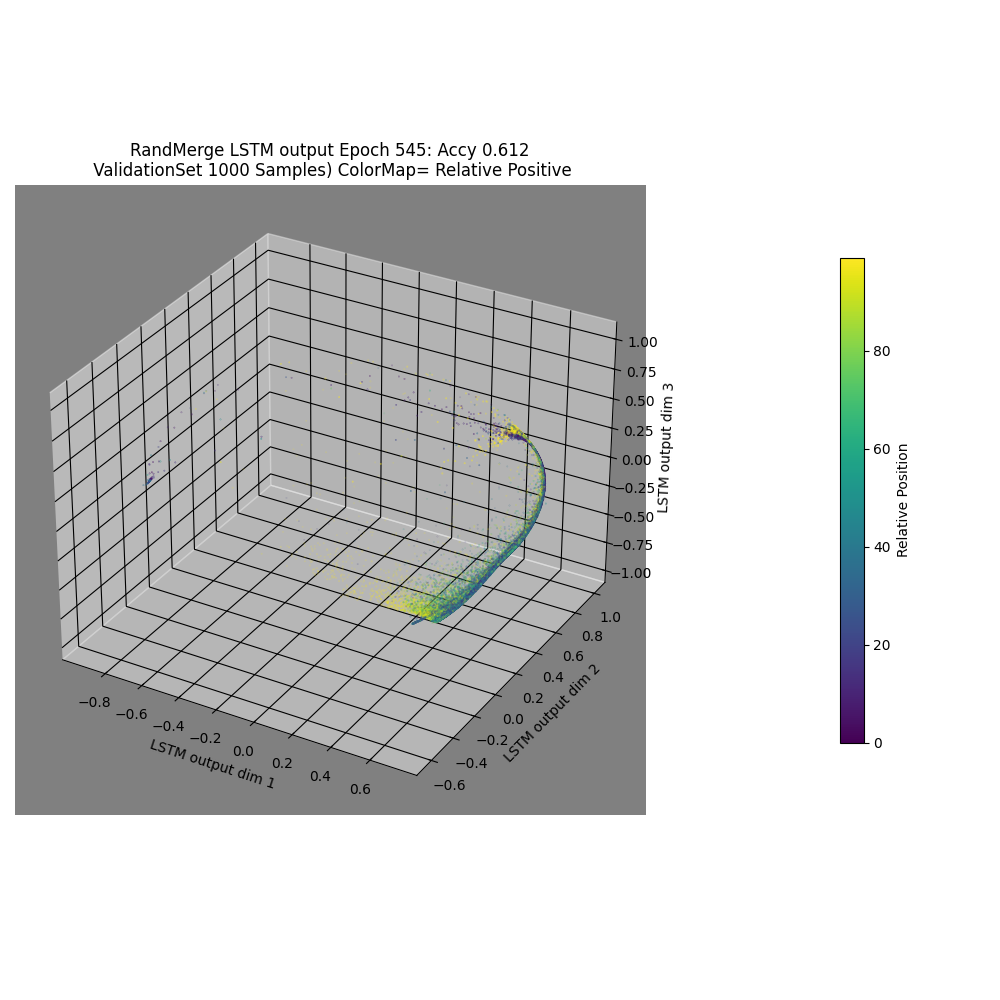

In [105]:
start,stop=5,175
plt.close('all')
plt.rcParams['grid.color'] = "black"
curlfig=plt.figure(figsize=(10,10))
curlax=curlfig.add_subplot(projection='3d')
#curlax2=curlfig.add_subplot(1,2,2,projection='3d')
for i in range(start,stop):
    keep=np.ceil((i/test1['length'])*100)
    keep=np.where(keep>=100,-1,keep).astype(int)
    p = [ int(k) for k in keep if(k!=-1)]
    keep=np.where(keep!=-1)[0]
    curlax.scatter(sample[keep,i:i+1,0], sample[keep,i:i+1,1], sample[keep,i:i+1,2],
                 s=0.05,c=nco[p])
    #curlax2.scatter(sample[keep,i:i+1,0], sample[keep,i:i+1,1], sample[keep,i:i+1,2],
    #             s=1,c=nco2[keep,i:i+1])
    #curlax.quiver(sample[keep,i:i+1,0], sample[keep,i:i+1,1], sample[keep,i:i+1,2],
    #               sample_curl[keep,i:i+1,0],sample_curl[keep,i:i+1,1], sample_curl[keep,i:i+1,2] ,
    #             length=0.05, normalize=True,color=nco[keep,i:i+1])
    
    #curlax.scatter3D(sample[:,i:i+1,0], sample[:,i:i+1,1], sample[:,i:i+1,2],c=nco[:,i:i+1],s=5)
    curlax.set_xlabel('LSTM output dim 1')
    curlax.set_ylabel('LSTM output dim 2')
    curlax.set_zlabel('LSTM output dim 3')
    
    curlax.set_facecolor('gray')
sm = plt.cm.ScalarMappable(cmap=negcolormap, norm=norm)
cbar=curlfig.colorbar(sm,ax=curlax,shrink=0.5,pad=0.2)
cbar.set_label('Relative Position')

curlax.set_title(f"RandMerge LSTM output Epoch {epoch}: Accy {accy.loc[epoch]['Accy']}\n ValidationSet 1000 Samples) ColorMap= Relative Positive")
plt.tight_layout()
plt.show()

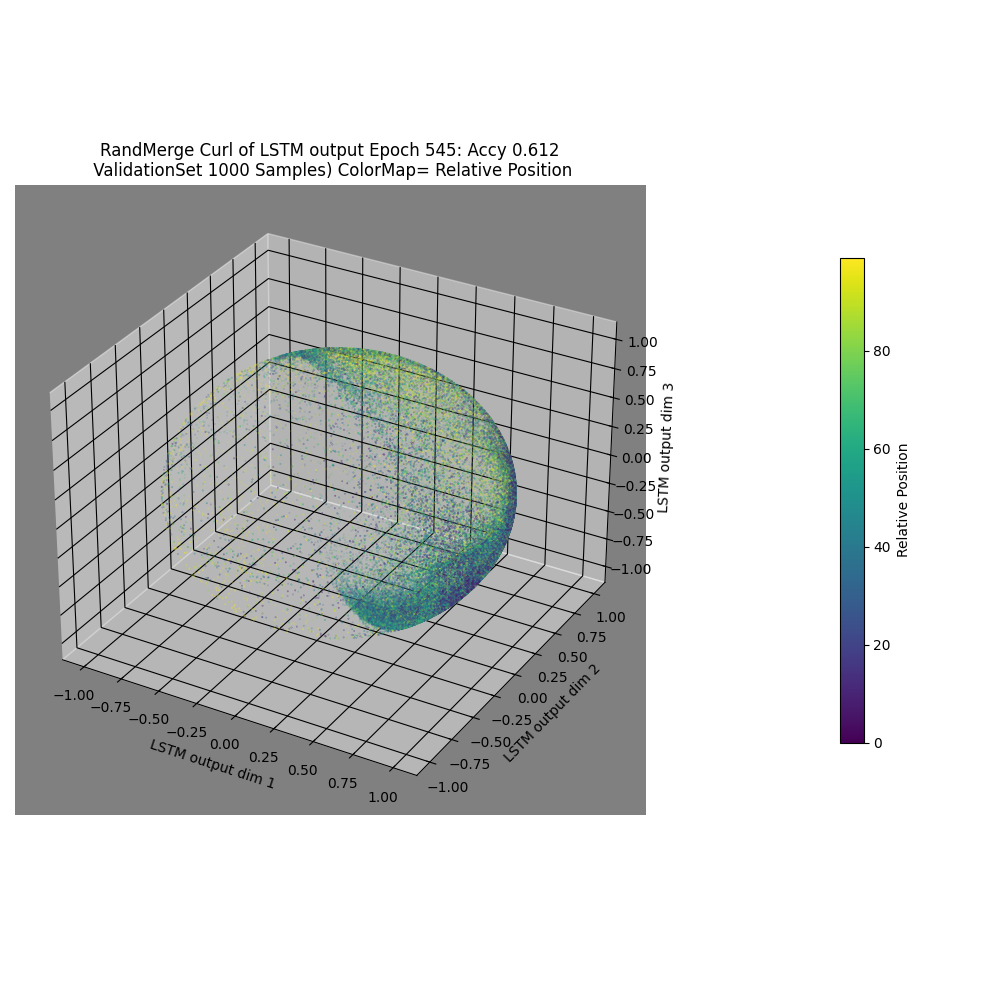

In [107]:
plt.close('all')
plt.rcParams['grid.color'] = "black"
divfig=plt.figure(figsize=(10,10))
curlax=divfig.add_subplot(projection='3d')
curlax.set_facecolor('gray')
for i in range(start,stop):
    keep=np.ceil(i/test1['length']*100)
    keep=np.where(keep>=100,-1,keep)
    p = [ int(k) for k in keep if(k!=-1)]
    keep=np.where(keep!=-1)[0]
    curlax.scatter3D(sample_curl[keep,i:i+1,0], sample_curl[keep,i:i+1,1],sample_curl[keep,i:i+1,2],s=0.05,c=nco[p])
    curlax.set_xlabel('LSTM output dim 1')
    curlax.set_ylabel('LSTM output dim 2')
    curlax.set_zlabel('LSTM output dim 3')
#sm = plt.cm.ScalarMappable(cmap=cm.bwr, norm=norm)

sm = plt.cm.ScalarMappable(cmap=negcolormap, norm=norm)
cbar=divfig.colorbar(sm,ax=curlax,shrink=0.5,pad=0.2)
cbar.set_label('Relative Position')

curlax.set_title(f"RandMerge Curl of LSTM output Epoch {epoch}: Accy {accy.loc[epoch]['Accy']}\n ValidationSet 1000 Samples) ColorMap= Relative Position")

plt.tight_layout()
plt.show()

In [ ]:
posaccounting={}
for t in list(negCount.keys()):
    doc=nlp(t)
    try:
        posaccounting[doc[0].pos_].append(negCount[t])
    except KeyError:
        posaccounting[doc[0].pos_]=[negCount[t]]

In [ ]:
with open('./posaccounting_negTextFreq.plk','wb') as f:
    pickle.dump(posaccounting,f)


In [ ]:
for pos_ in list(posaccounting.keys()):
    print(f'{pos_} : {np.mean(posaccounting[pos_])}')

In [50]:
sd=[]
for k,i in spacy.symbols.IDS.items():
    if(i>83 and i<104):
        print(f'{i} {k}')
        sd.append(k)

84 ADJ
85 ADP
86 ADV
87 AUX
88 CONJ
89 CCONJ
90 DET
91 INTJ
92 NOUN
93 NUM
94 PART
95 PRON
96 PROPN
97 PUNCT
98 SCONJ
99 SYM
100 VERB
101 X
102 EOL
103 SPACE


In [38]:
print(sd)

['ADJ', 'ADP', 'ADV', 'AUX', 'CONJ', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X', 'EOL', 'SPACE']


In [90]:
accy.loc[545]

Epoch     545 Validation Finished
loss                     0.458208
Accy                        0.612
Name: 545, dtype: object

In [ ]:
['Start','End','ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X', 'SPACE']